In [78]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
import matplotlib.pyplot as plt


In [79]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
y=df['Outcome']
X=df.drop(columns=['Outcome'])

In [81]:
#split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [82]:
#scale the dataset to make easy for knn
scaler=StandardScaler()

In [83]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [84]:
#now build the model and train it
model=KNeighborsClassifier(n_neighbors=5)

In [85]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
y_pred=model.predict(X_test)

In [87]:
#calculate the reuslts
print("Confusion matrix:",confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Error rate:",1-accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))

Confusion matrix: [[83 16]
 [31 24]]
Accuracy: 0.6948051948051948
Error rate: 0.30519480519480524
Precision: 0.6
Recall: 0.43636363636363634


In [88]:
cm=confusion_matrix(y_test,y_pred)

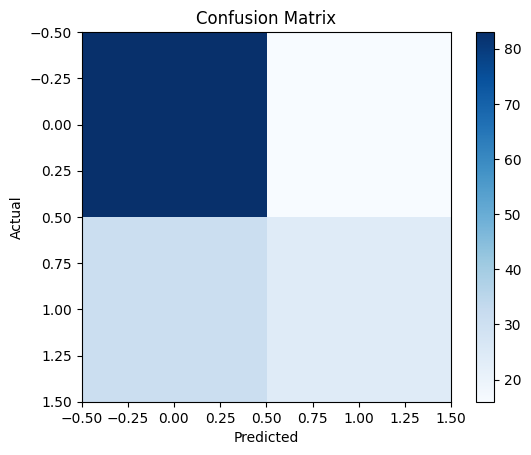

In [89]:
plt.imshow(cm,cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()